In [1]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
us = pd.read_csv('Global_Mobility_Report.csv', index_col='sub_region_1')
us.drop(columns=['country_region_code', 'country_region', 'sub_region_2', 'date'], inplace=True)
us.reset_index(inplace=True)
us

,sub_region_1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,-45,-7,-16,-49,-38,14
1,Alabama,-39,3,11,-35,-29,10
2,Alaska,-41,-4,36,-52,-32,10
3,Arizona,-43,-14,-42,-45,-36,14
4,Arkansas,-35,1,1,-34,-26,10
5,California,-48,-14,-46,-53,-40,18
6,Colorado,-46,-11,-2,-53,-40,14
7,Connecticut,-44,-9,76,-54,-40,15
8,Delaware,-41,-16,26,-48,-37,14
9,District of Columbia,-69,-28,-65,-69,-48,17


In [3]:
states = geopandas.read_file('cb_2018_us_state_5m.shp')
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."


In [4]:
data = states.merge(us, left_on='NAME', right_on='sub_region_1')

In [5]:
data.drop(columns=['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'LSAD', 'ALAND', 'AWATER', 'sub_region_1'], inplace=True)

In [6]:
data

,NAME,geometry,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Nebraska,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",-39,4,52,-21,-29,11
1,Washington,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217...",-47,-10,3,-50,-41,14
2,New Mexico,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",-46,-10,-22,-36,-36,14
3,South Dakota,"POLYGON ((-104.05770 44.99743, -104.05021 44.9...",-47,1,-16,-42,-31,15
4,Texas,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",-45,-14,-54,-49,-38,16
5,California,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987...",-48,-14,-46,-53,-40,18
6,Kentucky,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ...",-39,3,60,-36,-33,10
7,Ohio,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ...",-41,-2,82,-28,-37,12
8,Alabama,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...",-39,3,11,-35,-29,10
9,Georgia,"POLYGON ((-85.60516 34.98468, -85.55259 34.984...",-40,-5,3,-53,-36,13


In [20]:
data.to_csv('data.csv')

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

(-197.0936305, 197.7247605, 16.29571125, 73.97431575)

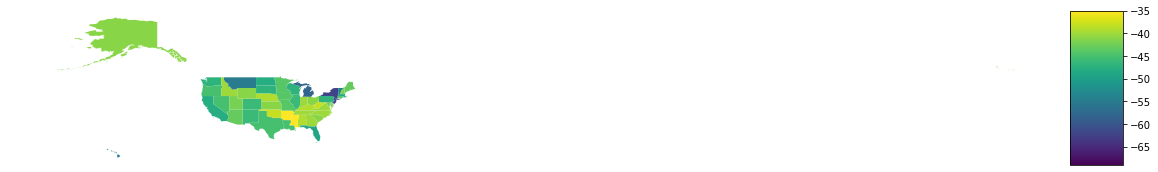

In [21]:
fig, ax = plt.subplots(figsize=(20,10))

divider = make_axes_locatable(ax)
legend_ax = divider.append_axes('right', size='5%', pad=0.1)

data.plot(column='retail_and_recreation_percent_change_from_baseline', ax=ax, legend=True, cax=legend_ax)
ax.axis('off')